# Convolutional Neural Networks in Python with Keras
## Fashion-MNIST Data Set

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

In this tutorial, you’ll learn how to implement Convolutional Neural Networks (CNNs) in Python with Keras, and how to overcome overfitting with dropout.
You might have already heard of image or facial recognition or self-driving cars. These are real-life implementations of Convolutional Neural Networks (CNNs). In this blog post, you will learn and understand how to implement these deep, feed-forward artificial neural networks in Keras and also learn how to overcome overfitting with the regularization technique called "dropout".

More specifically, you'll tackle the following topics in today's tutorial:

You will be introduced to convolutional neural networks;
Then, you'll first try to understand the data. You'll use Python and its libraries to load, explore and analyze your data,
After that, you'll preprocess your data: you'll learn how to resize, rescale, convert your labels into one-hot encoding vectors and split up your data in training and validation sets;
With all of this done, you can construct the neural network model: you'll learn how to model the data and form the network. Next, you'll compile, train and evaluate the model, visualizing the accuracy and loss plots;
Then, you will learn about the concept of overfitting and how you can overcome it by adding a dropout layer;
With this information, you can revisit your original model and re-train the model. You'll also re-evaluate your new model and compare the results of both the models;
Next, you'll make predictions on the test data, convert the probabilities into class labels and plot few test samples that your model correctly classified and incorrectly classified;
Finally, you will visualize the classification report which will give you more in-depth intuition about which class was (in)correctly classified by your model.

## Load the Data
Keras comes with a library called datasets, which you can use to load datasets out of the box: you download the data from the server and speeds up the process since you no longer have to download the data to your computer. The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 6s 1us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

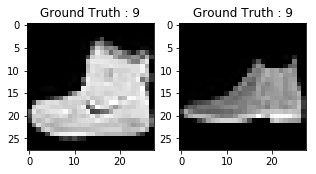

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

## Data Processing

As you could see in the above plot, the images are grayscamle images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, you'll need to preprocess the data before you feed it into the model. 

As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. 

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Now you need to convert the class labels into a one-hot encoding vector.
In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Model the Data

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

You will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. You will train the network for 20 epochs.

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

## Train the Model
It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help you to analyze your model's performance visually.

In [15]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.4660 - acc: 0.8308 - val_loss: 0.3635 - val_acc: 0.8715
Epoch 2/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2934 - acc: 0.8927 - val_loss: 0.2766 - val_acc: 0.9000
Epoch 3/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0.2463 - acc: 0.9093 - val_loss: 0.2610 - val_acc: 0.9070
Epoch 4/20
48000/48000 [==============================] - 70s 1ms/step - loss: 0.2172 - acc: 0.9199 - val_loss: 0.2358 - val_acc: 0.9133
Epoch 5/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.1895 - acc: 0.9294 - val_loss: 0.2207 - val_acc: 0.9207
Epoch 6/20
48000/48000 [==============================] - 79s 2ms/step - loss: 0.1660 - acc: 0.9376 - val_loss: 0.2292 - val_acc: 0.9179
Epoch 7/20
48000/48000 [==============================] - 81s 2ms/step - loss: 0

 You trained the model on fashion-MNIST for 20 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is 99% and the training loss is quite low.

However, it looks like the model is overfitting, as the validation loss is 0.4396 and the validation accuracy is 92%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

You probably need to handle this. In next sections, you'll learn how you can make your model perform much better by adding a Dropout layer into the network and keeping all the other layers unchanged.

But first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

## Model Evaluation

In [17]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.45040963472398
Test accuracy: 0.9169


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark that was reported here, which is an SVM classifier with mean accuracy of 0.897. Also, the model does well compared to some of the deep learning models mentioned on the GitHub profile of the creators of fashion-MNIST dataset.

However, you saw that the model looked like it was overfitting. Are these results really all that good?

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

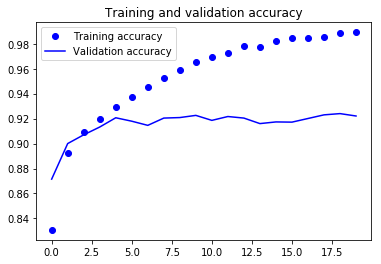

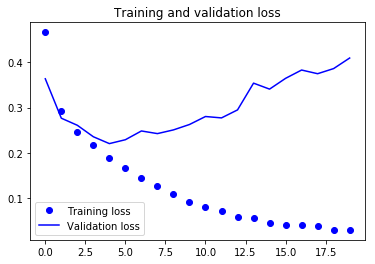

In [18]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

## Adding Dropout into the Network

In [19]:
batch_size = 64
epochs = 20
num_classes = 10

In [20]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

## Model evaluation

In [25]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 6s 646us/step
Test loss: 2.3078921813964843
Test accuracy: 0.0985


Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss decreased compared to the previous results.

Now, let's plot the accuracy and loss plots between training and validation data for the one last time.

In [27]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 102s 2ms/step - loss: 0.5937 - acc: 0.7815 - val_loss: 0.3897 - val_acc: 0.8582
Epoch 2/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.3734 - acc: 0.8640 - val_loss: 0.3095 - val_acc: 0.8858
Epoch 3/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.3259 - acc: 0.8808 - val_loss: 0.2827 - val_acc: 0.8980
Epoch 4/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.2977 - acc: 0.8890 - val_loss: 0.2573 - val_acc: 0.9062
Epoch 5/20
48000/48000 [==============================] - 87s 2ms/step - loss: 0.2802 - acc: 0.8962 - val_loss: 0.2499 - val_acc: 0.9064
Epoch 6/20
48000/48000 [==============================] - 82s 2ms/step - loss: 0.2669 - acc: 0.9021 - val_loss: 0.2365 - val_acc: 0.9136
Epoch 7/20
48000/48000 [==============================] - 82s 2ms/step - loss: 0.2571 - acc: 0.9048 - val_loss: 0.2398 - val_ac

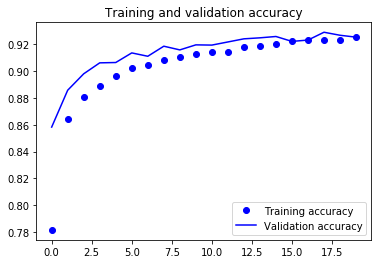

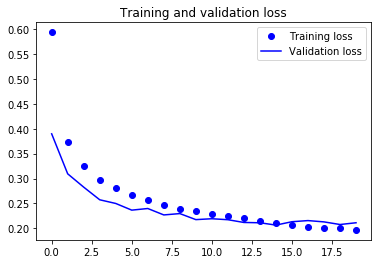

In [28]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, you can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

## Predict Labels

In [29]:
predicted_classes = fashion_model.predict(test_X)

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

In [30]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9175 correct labels


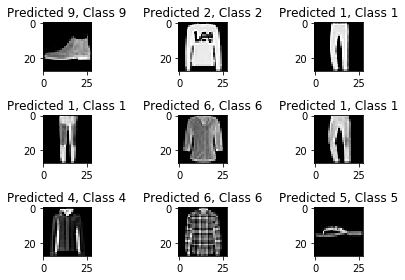

In [33]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 825 incorrect labels


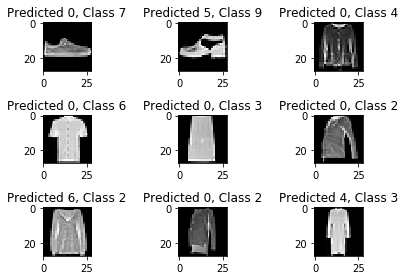

In [35]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, you cannot be sure as to why your model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. For example, images 5 and 6 both belong to different classes but look kind of similar maybe a jacket or perhaps a long sleeve shirt.

## Classification Report

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.90      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.84      0.90      0.87      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.82      0.70      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



You can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0 and class 2, the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.